In [2]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.decomposition import PCA
from sklearn.ensemble import StackingClassifier,BaggingClassifier,AdaBoostClassifier


In [3]:
#Reading Data
dataset1 = pd.read_csv('data1.csv')
dataset2 = pd.read_csv('data2.csv')
dataset = pd.concat( [dataset1, dataset2])
print(dataset1.shape + dataset2.shape + dataset.shape)
dataset.head()


(139998, 31, 144809, 31, 284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 144808
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
dataset = dataset.drop_duplicates()
dataset.loc[dataset.duplicated()]
dataset.shape

(283726, 31)

In [28]:
#Visualization
dataset.Class.value_counts().hvplot.bar(
    title="is Fraud Count",  ylabel='Count',
    width=500, height=350
)

:Bars   [index]   (Class)

Text(0.5, 0, 'Amount')

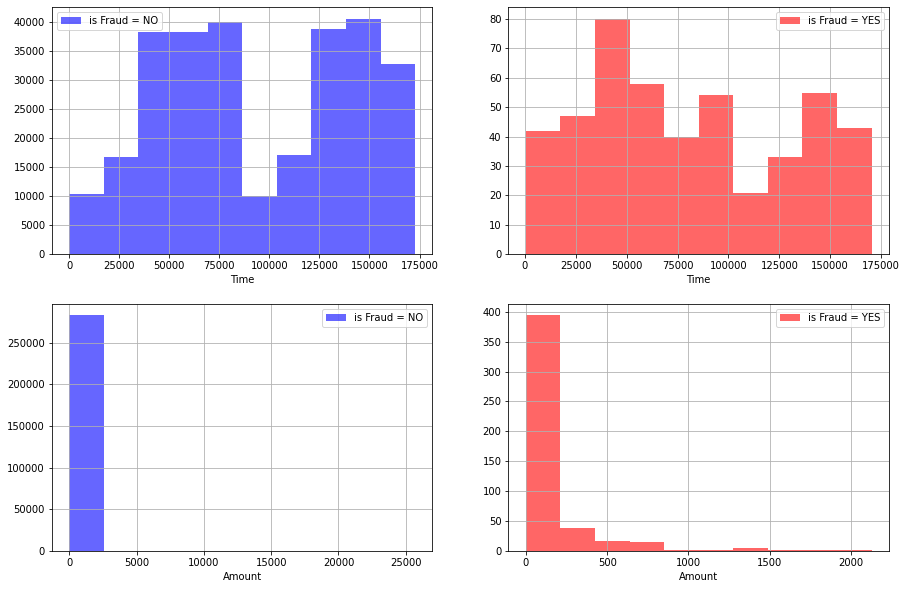

In [9]:
plt.figure(figsize=(15, 10))
#for Time
plt.subplot(2, 2, 1)
dataset[dataset["Class"] == 0]["Time"].hist(bins=10, color='blue', label='is Fraud = NO', alpha=0.6)
#dataset[dataset["Class"] == 1]["Time"].hist(bins=10, color='red', label='is Fraud = YES', alpha=0.6)
plt.legend()
plt.xlabel("Time")

plt.subplot(2, 2, 2)
#dataset[dataset["Class"] == 0]["Time"].hist(bins=10, color='blue', label='is Fraud = NO', alpha=0.6)
dataset[dataset["Class"] == 1]["Time"].hist(bins=10, color='red', label='is Fraud = YES', alpha=0.6)
plt.legend()
plt.xlabel("Time")

#for Amount
plt.subplot(2, 2, 3)
dataset[dataset["Class"] == 0]["Amount"].hist(bins=10, color='blue', label='is Fraud = NO', alpha=0.6)
#dataset[dataset["Class"] == 1]["Amount"].hist(bins=10, color='red', label='is Fraud = YES', alpha=0.6)
plt.legend()
plt.xlabel("Amount")

plt.subplot(2, 2, 4)
#dataset[dataset["Class"] == 0]["Amount"].hist(bins=10, color='blue', label='is Fraud = NO', alpha=0.6)
dataset[dataset["Class"] == 1]["Amount"].hist(bins=10, color='red', label='is Fraud = YES', alpha=0.6)
plt.legend()
plt.xlabel("Amount")




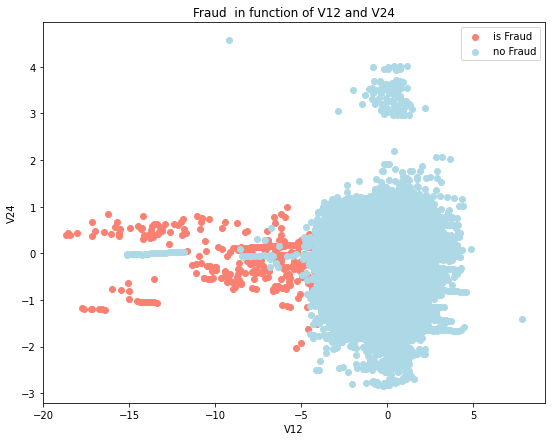

In [10]:
plt.figure(figsize=(9, 7))

plt.scatter(dataset.V12[dataset.Class==1],
            dataset.V24[dataset.Class==1],
            c="salmon")

plt.scatter(dataset.V12[dataset.Class==0],
            dataset.V24[dataset.Class==0],
            c="lightblue")

plt.title("Fraud  in function of V12 and V24")
plt.xlabel("V12")
plt.ylabel("V24")
plt.legend(["is Fraud", "no Fraud"]);

In [11]:
#Select Features
features = dataset.drop(columns =['Class'], axis = 1)
#Select Target 
target = dataset['Class']

# Set Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .3, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (198608, 30)
Shape of testing feature: (85118, 30)
Shape of training label: (198608,)
Shape of training label: (85118,)


In [12]:
#Standardization
scaler = StandardScaler()
# Scale trainint data
X_train = scaler.fit_transform(X_train)
# Scale test data
X_test = scaler.fit_transform(X_test)

In [13]:
#Rate Model Building
def rate_model(model, x_test, y_test):

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Display confussion matrix
    cm = confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'cm': cm}          


In [14]:
# Calculate area under curve (AUC)
def show_roc(y_test, preds):

    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('ROC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()

Accuracy: 0.9990248831034564
Confusion Matrix:
 [[84956    11]
 [   72    79]]


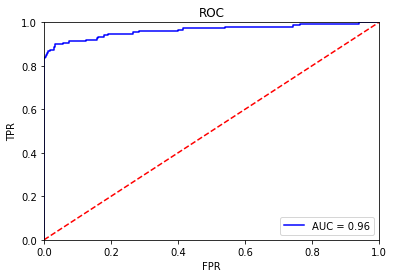

In [15]:
# Building a model using LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train) 

# Rate Model
lr_rate = rate_model(lr_clf, X_test, y_test)

# Print result
print('Accuracy:', lr_rate['acc'])
print('Confusion Matrix:\n', lr_rate['cm'])

#ROC
show_roc(y_test, lr_clf.predict_proba(X_test)[:,1])

Accuracy: 0.9783829507272257
Confusion Matrix:
 [[83159  1808]
 [   32   119]]


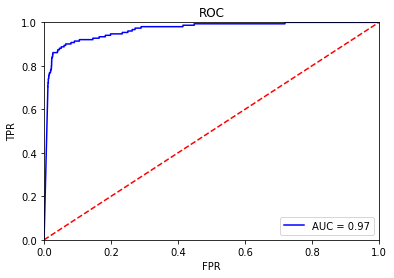

In [16]:
# Building a model using NaiveBayes

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train) 

# Rate Model
nb_rate = rate_model(nb_clf, X_test, y_test)

# Print result
print('Accuracy:', nb_rate['acc'])
print('Confusion Matrix:\n', nb_rate['cm'])

#ROC
show_roc(y_test, nb_clf.predict_proba(X_test)[:,1])

In [17]:
# Building a model using SupportVectorMachines

svm_clf = SVC(kernel='rbf', gamma="auto", C=1000)
svm_clf.fit(X_train, y_train) 

# Rate Model
svm_rate = rate_model(svm_clf, X_test, y_test)

# Print result
print('Accuracy:', svm_rate['acc'])
print('Confusion Matrix:\n', svm_rate['cm'])

#ROC
#show_roc(y_test, svm_clf.predict_proba(X_test)[:,1])

Accuracy: 0.9990483798961441
Confusion Matrix:
 [[84942    25]
 [   56    95]]


Accuracy: 0.999177612255927
Confusion Matrix:
 [[84941    26]
 [   44   107]]


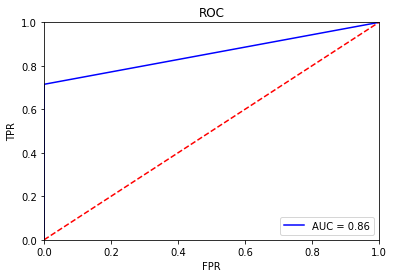

In [18]:
# Building a model using DecisionTree

dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train) 

# Rate Model
dt_rate = rate_model(dt_clf, X_test, y_test)

# Print result
print('Accuracy:', dt_rate['acc'])
print('Confusion Matrix:\n', dt_rate['cm'])

#ROC
show_roc(y_test, dt_clf.predict_proba(X_test)[:,1])

In [19]:
#PCA
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Accuracy: 0.9986254376277638
Confusion Matrix:
 [[84961     6]
 [  111    40]]


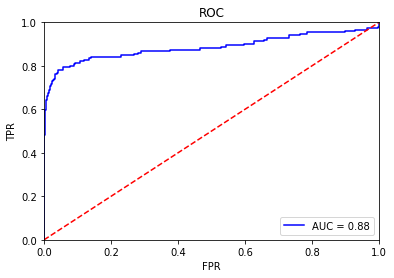

In [20]:
# Building a model using LogisticRegression with PCA

lr_clf_P = LogisticRegression()
lr_clf_P.fit(X_train, y_train) 

# Rate Model
lr_P_rate = rate_model(lr_clf_P, X_test, y_test)

# Print result
print('Accuracy:', lr_P_rate['acc'])
print('Confusion Matrix:\n', lr_P_rate['cm'])

#ROC
show_roc(y_test, lr_clf_P.predict_proba(X_test)[:,1])

Accuracy: 0.9800042294226838
Confusion Matrix:
 [[83343  1624]
 [   78    73]]


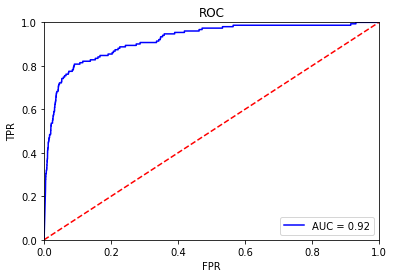

In [21]:
# Building a model using NaiveBayes with PCA

nb_clf_P = GaussianNB()
nb_clf_P.fit(X_train, y_train) 

# Rate Model
nb_P_rate = rate_model(nb_clf_P, X_test, y_test)

# Print result
print('Accuracy:', nb_P_rate['acc'])
print('Confusion Matrix:\n', nb_P_rate['cm'])

#ROC
show_roc(y_test, nb_clf_P.predict_proba(X_test)[:,1])

In [22]:
# Building a model using SupportVectorMachines with PCA

svm_clf_P = SVC(kernel='rbf', gamma="auto", C=1000)
svm_clf_P.fit(X_train, y_train) 

# Rate Model
svm_P_rate = rate_model(svm_clf_P, X_test, y_test)

# Print result
print('Accuracy:', svm_P_rate['acc'])
print('Confusion Matrix:\n', svm_P_rate['cm'])

#ROC
#show_roc(y_test, svm_clf_P.predict_proba(X_test)[:,1])

Accuracy: 0.9986136892314199
Confusion Matrix:
 [[84931    36]
 [   82    69]]


Accuracy: 0.9984374632862614
Confusion Matrix:
 [[84965     2]
 [  131    20]]


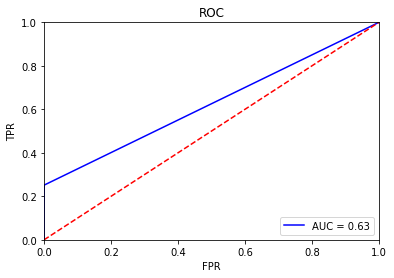

In [23]:
# Building a model using DecisionTree with PCA

dt_clf_P = DecisionTreeClassifier(max_depth=2)
dt_clf_P.fit(X_train, y_train) 

# Rate Model
dt_P_rate = rate_model(dt_clf_P, X_test, y_test)

# Print result
print('Accuracy:', dt_P_rate['acc'])
print('Confusion Matrix:\n', dt_P_rate['cm'])

#ROC
show_roc(y_test, dt_clf_P.predict_proba(X_test)[:,1])

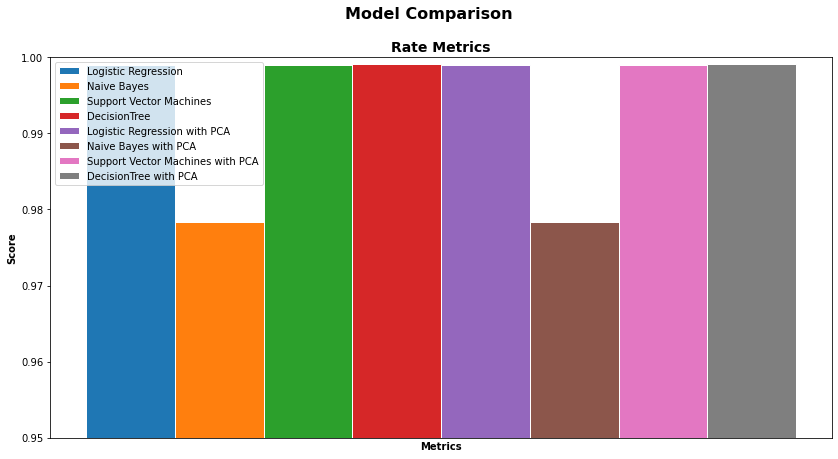

In [24]:
#Comparison
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

barWidth = 0.05
lr_score = [lr_rate['acc']]
nb_score = [nb_rate['acc']]
svm_score = [svm_rate['acc']]
dt_score = [dt_rate['acc']]

lr_P_score = [lr_P_rate['acc']]
nb_P_score = [nb_P_rate['acc']]
svm_P_score = [svm_P_rate['acc']]
dt_P_score = [dt_P_rate['acc']]

ax1.bar(1, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(1.05, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(1.1, svm_score, width=barWidth, edgecolor='white', label='Support Vector Machines')
ax1.bar(1.15, dt_score, width=barWidth, edgecolor='white', label='DecisionTree')

ax1.bar(1.2, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression with PCA')
ax1.bar(1.25, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes with PCA')
ax1.bar(1.3, svm_score, width=barWidth, edgecolor='white', label='Support Vector Machines with PCA')
ax1.bar(1.35, dt_score, width=barWidth, edgecolor='white', label='DecisionTree with PCA')

ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy']
ax1.set_xticks([r + (barWidth * 1.05) for r in range(len(lr_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0.95, 1)

ax1.set_title('Rate Metrics', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()

Accuracy: 0.9981555017740078
Confusion Matrix:
 [[84886    81]
 [   76    75]]


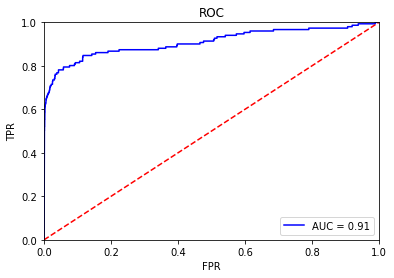

In [25]:
#Ensemble Methods : Stacking
all_models = [('lr',LogisticRegression()),('dt',DecisionTreeClassifier(max_depth=2))]

Stacking_model  = StackingClassifier(estimators=all_models, final_estimator=GaussianNB())
Stacking_model = Stacking_model.fit(X_train, y_train)
 
# Rate Model
Stacking_model_rate = rate_model(Stacking_model, X_test, y_test)

# Print result
print('Accuracy:', Stacking_model_rate['acc'])
print('Confusion Matrix:\n', Stacking_model_rate['cm'])

#ROC
show_roc(y_test, Stacking_model.predict_proba(X_test)[:,1])

Accuracy: 0.9897319015954322
Confusion Matrix:
 [[84181   786]
 [   88    63]]


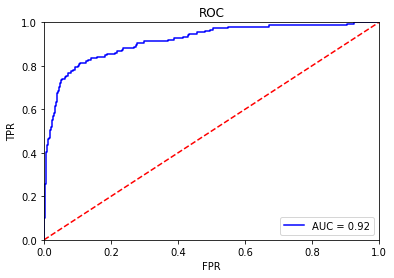

In [26]:
#Ensemble Methods :  Bagging and Pasting

bagging_model = BaggingClassifier(GaussianNB(), max_samples=0.5, max_features=0.5,  bootstrap=True)#bootstrap=False for Pasting
bagging_model = bagging_model.fit(X_train, y_train)
 
# Rate Model
bagging_model_rate = rate_model(bagging_model, X_test, y_test)

# Print result
print('Accuracy:', bagging_model_rate['acc'])
print('Confusion Matrix:\n', bagging_model_rate['cm'])

#ROC
show_roc(y_test, bagging_model.predict_proba(X_test)[:,1])

Accuracy: 0.9985314504570126
Confusion Matrix:
 [[84948    19]
 [  106    45]]


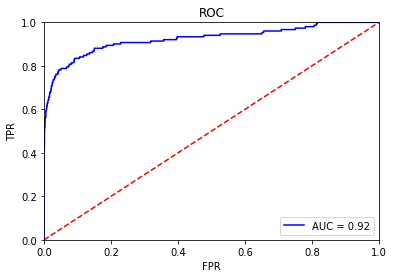

In [27]:
#Ensemble Methods : Boosting
Boosting_model = AdaBoostClassifier(n_estimators=100)
Boosting_model = Boosting_model.fit(X_train, y_train)
 
# Rate Model
Boosting_model_rate = rate_model(Boosting_model, X_test, y_test)

# Print result
print('Accuracy:', Boosting_model_rate['acc'])
print('Confusion Matrix:\n', Boosting_model_rate['cm'])

#ROC
show_roc(y_test, Boosting_model.predict_proba(X_test)[:,1])

<div style="color:white;display:fill;border-radius:8px;
            background-color:black;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 12px
;color:white;"><b> Mohammad Ghasemi</b></p>
</div>. 